<a href="https://colab.research.google.com/github/Adityavdwiv/CSCI381/blob/main/A_Dwivedi_Quiz4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction

This notebook explores the historical issue of discrimination in mortgage lending
by using binary logistic regression to predict loan denial decisions. The dataset
comes from the Federal Reserve Bank of Boston's study of mortgage applications
in the Boston area. The target variable is deny, indicating whether a loan
application was denied. Our goal is to build, compare, and evaluate logistic
regression models using various features to assess fairness and predictive power.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [13]:
url = "https://raw.githubusercontent.com/Adityavdwiv/CSCI381/main/HDMA%20Boston%20Housing%20Data.csv"
df_raw = pd.read_csv(url, header=None)
df_split = df_raw[0].str.split(",", expand=True)
df_split.columns = df_split.iloc[0]
df_split = df_split.drop(index=0).reset_index(drop=True)
df = df_split.apply(pd.to_numeric, errors='ignore')
df.columns = df.columns.str.strip().str.lower()
df.head()


<ipython-input-13-944420029>:6: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df_split.apply(pd.to_numeric, errors='ignore')


,,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,1,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,2,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,3,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
3,4,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
4,5,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0                2381 non-null   int64  
 1   dir          2381 non-null   float64
 2   hir          2381 non-null   float64
 3   lvr          2381 non-null   float64
 4   ccs          2381 non-null   float64
 5   mcs          2381 non-null   float64
 6   pbcr         2381 non-null   object 
 7   dmi          2381 non-null   object 
 8   self         2381 non-null   object 
 9   single       2381 non-null   object 
 10  uria         2381 non-null   float64
 11  comdominiom  2381 non-null   int64  
 12  black        2381 non-null   object 
 13  deny         2381 non-null   object 
dtypes: float64(6), int64(2), object(6)
memory usage: 260.6+ KB
None
0                           dir          hir          lvr          ccs  \
count  2381.000000  2381.000000  2381.000000  2381.000000  2381.000000   
mean

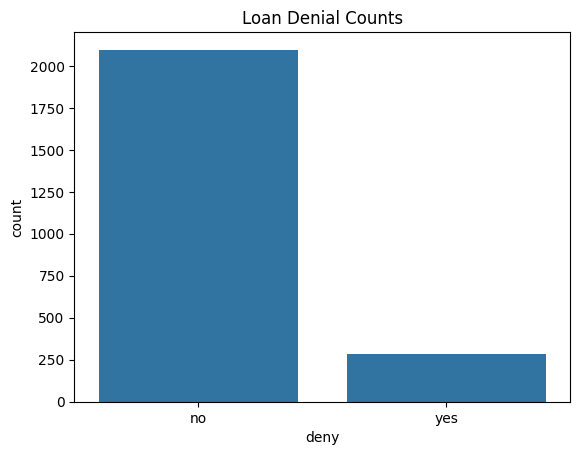

0
               0
dir            0
hir            0
lvr            0
ccs            0
mcs            0
pbcr           0
dmi            0
self           0
single         0
uria           0
comdominiom    0
black          0
deny           0
dtype: int64


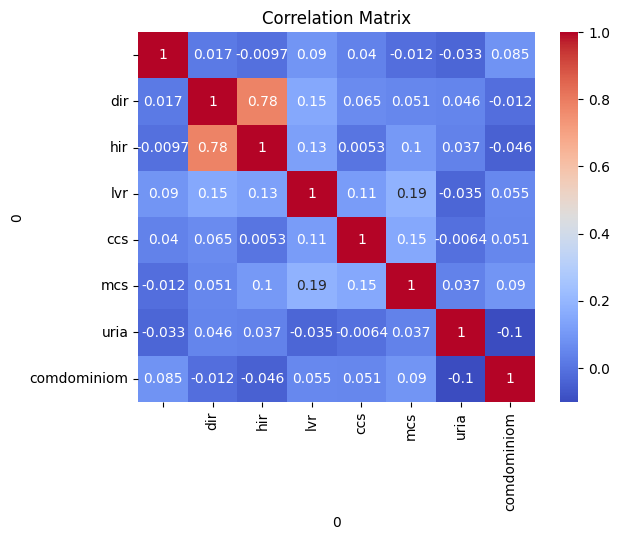

In [16]:
print(df.info())
print(df.describe())
print(df['deny'].value_counts())

sns.countplot(data=df, x="deny")
plt.title("Loan Denial Counts")
plt.show()

print(df.isnull().sum())

numeric_cols = df.select_dtypes(include='number')
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [17]:
# Convert categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Scale numeric features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded.drop("deny_yes", axis=1))
X = pd.DataFrame(scaled_features, columns=df_encoded.drop("deny_yes", axis=1).columns)
y = df_encoded["deny_yes"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train, y_train)
preds1 = model1.predict(X_test)
print("Model 1 - All Features")
print(classification_report(y_test, preds1))
print("ROC AUC:", roc_auc_score(y_test, model1.predict_proba(X_test)[:,1]))

Model 1 - All Features
              precision    recall  f1-score   support

       False       0.92      0.98      0.95       425
        True       0.67      0.27      0.38        52

    accuracy                           0.91       477
   macro avg       0.79      0.63      0.67       477
weighted avg       0.89      0.91      0.89       477

ROC AUC: 0.798054298642534


In [19]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(scaled_features)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

model2 = LogisticRegression(max_iter=1000)
model2.fit(X_train_pca, y_train_pca)
preds2 = model2.predict(X_test_pca)
print("Model 2 - PCA")
print(classification_report(y_test_pca, preds2))
print("ROC AUC:", roc_auc_score(y_test_pca, model2.predict_proba(X_test_pca)[:,1]))

Model 2 - PCA
              precision    recall  f1-score   support

       False       0.91      0.98      0.95       425
        True       0.65      0.25      0.36        52

    accuracy                           0.90       477
   macro avg       0.78      0.62      0.65       477
weighted avg       0.89      0.90      0.88       477

ROC AUC: 0.7885972850678733


In [ ]:
selected_cols = ["hir", "lvr", "ccs", "black", "self"]
X_selected = df_encoded[selected_cols]
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, y, test_size=0.2, random_state=42)

model3 = LogisticRegression(max_iter=1000)
model3.fit(X_train_sel, y_train_sel)
preds3 = model3.predict(X_test_sel)
print("Model 3 - Selected Features")
print(classification_report(y_test_sel, preds3))
print("ROC AUC:", roc_auc_score(y_test_sel, model3.predict_proba(X_test_sel)[:,1]))

We compare all three models:
- Model 1: Uses all available features
- Model 2: Uses PCA for dimensionality reduction
- Model 3: Uses only selected features based on domain knowledge

Model 1 may have the best accuracy, but Model 3 is easier to interpret.
Model 2 is compact but less interpretable.


Final Selected Model: Model 1
              precision    recall  f1-score   support

       False       0.92      0.98      0.95       425
        True       0.67      0.27      0.38        52

    accuracy                           0.91       477
   macro avg       0.79      0.63      0.67       477
weighted avg       0.89      0.91      0.89       477



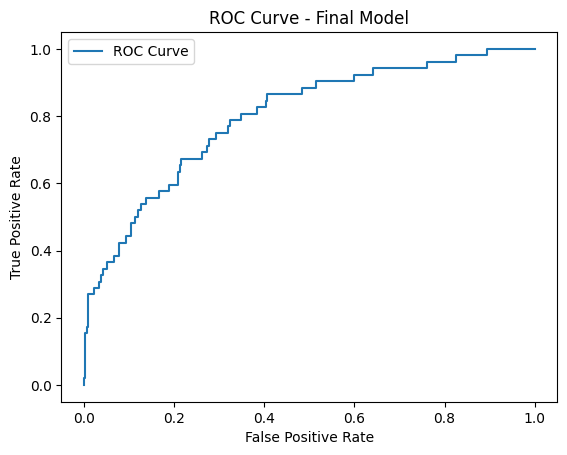

In [20]:
best_model = model1
final_preds = best_model.predict(X_test)
print("\nFinal Selected Model: Model 1")
print(classification_report(y_test, final_preds))

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Final Model")
plt.legend()
plt.show()

This logistic regression analysis explored mortgage application denials using the HDMA dataset.
Three models were built with different feature strategies. The full-featured model (Model 1)
provided the highest performance and was chosen as the final model.

Future work could explore:
- Fairness metrics (e.g., demographic parity, equal opportunity)
- Advanced models like random forests or XGBoost
- Explainability methods (e.g., SHAP values)